In [1]:
from IPython.display import FileLink

In [7]:
!head /home/armanda/Ox/Ox_DNA.csv

In [2]:
%load_ext rpy2.ipython

In [9]:
%%R
library(dplyr)
library(ggplot2)
library(tidyr)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Need help? Try the ggplot2 mailing list: http://groups.google.com/group/ggplot2.

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [27]:
%%R
df = read.csv("../Ox/Ox_DNA.csv")

In [28]:
%%R
df %>% head

  Sequence.Read.Depth Treatment Sample.Name Nap  Nar NirK NirS cNor qNor Nos
1            19422668        LA         LA1 497 2526  805   60  113 1012 484
2            18492827        LA         LA2 347 2397  694   47   85  829 419
3            20021554        LA         LA3 354 2953  799   45  105  862 408
4            10248314        SA         SA1 197 1294  422   26   46  529 198
5            16415878        SA         SA2 291 2210  714   40   72  789 320
6            18131468        SA         SA3 261 2503  700   35   73  685 275


In [29]:
%%R
df = read.csv("../Ox/Ox_DNA.csv") %>%
    gather(Gene.ID, count, 
           -Sample.Name, 
           -Sequence.Read.Depth,
           -Treatment) %>%
    mutate(relative.count = count / Sequence.Read.Depth * 1000000)

df$Treatment = factor(df$Treatment, levels = c("None", "O", "SA", "LA"))

df %>% head

  Sequence.Read.Depth Treatment Sample.Name Gene.ID count relative.count
1            19422668        LA         LA1     Nap   497       25.58866
2            18492827        LA         LA2     Nap   347       18.76403
3            20021554        LA         LA3     Nap   354       17.68095
4            10248314        SA         SA1     Nap   197       19.22267
5            16415878        SA         SA2     Nap   291       17.72674
6            18131468        SA         SA3     Nap   261       14.39486


In [30]:
%%R
theme_agile <- function(base_size = 11, base_family = "Arial", plot_type = "formal", lines_lwd = 0.25, ticks_type = "outer", plot_grid = TRUE, axis_font = base_family, title_size = base_size*1.2, legend_size = base_size,
												bg_col = ifelse(plot_type == "formal", "white", "#F0F0F0"), title_font = base_family , base_col  = "black", axis_lines = TRUE,
												minor_grid = ifelse(plot_grid, TRUE, FALSE), vert_grid = ifelse(plot_grid, TRUE, FALSE), ticks_length = ifelse(ticks_type == "outer", 0.2, -0.2), horz_grid = ifelse(plot_grid, TRUE, FALSE), alpha_leg = 0.1, bord_size = 0,
												legend_bg = ifelse(plot_type == "formal", "white", "#F0F0F0"), strip_bg = ifelse(plot_type == "formal", "white", "khaki1"), grid_thick = 1){
	theme_bw()+
		ggplot2::theme(
			plot.margin = grid::unit(c(1, 1, .5, .7), "cm"),
			text = ggplot2::element_text(family = base_family, size = base_size),
			axis.line =  element_line(size = ifelse(axis_lines, grid::unit(lines_lwd, "mm"),0), color = "black"),
			axis.ticks.length = grid::unit(ticks_length, "cm"),
			axis.ticks.margin = grid::unit(ifelse(ticks_length > 0,0.25, -ticks_length + 0.25) , "cm"),
			axis.text.x = ggplot2::element_text(size = base_size, colour = base_col , family = axis_font),
			axis.text.y = ggplot2::element_text(size = base_size, colour = base_col , family = axis_font),
			axis.title.y = ggplot2::element_text(size =  base_size, colour = base_col , vjust = 1.5, family = axis_font),
			axis.title.x = ggplot2::element_text(size = base_size,colour = base_col ,vjust = -.5, family = axis_font),
			panel.background = ggplot2::element_rect(fill = bg_col),
			plot.background = ggplot2::element_rect(fill = bg_col),
			panel.border = ggplot2::element_rect(colour = "black", fill=NA, size = bord_size),
			panel.grid.major.x = ggplot2::element_line(colour = ifelse(vert_grid, "grey60",bg_col), size = ifelse(vert_grid,0.45 * grid_thick, 0)),
			panel.grid.minor.x = ggplot2::element_line(colour = ifelse(vert_grid, ifelse(minor_grid, "grey80",bg_col),bg_col), size = ifelse(vert_grid,0.35* grid_thick, 0)),
			panel.grid.major.y = ggplot2::element_line(colour = ifelse(horz_grid, "grey60",bg_col), size = ifelse(horz_grid,0.45* grid_thick, 0)),
			panel.grid.minor.y = ggplot2::element_line(colour = ifelse(horz_grid, ifelse(minor_grid, "grey80",bg_col),bg_col), size = ifelse(horz_grid,0.35* grid_thick, 0)),
			panel.grid.major = ggplot2::element_line(colour = "grey40", size=0.45),
			plot.title = ggplot2::element_text(face="bold",hjust = ifelse(plot_type == "formal", 0.5, 0) ,vjust = 2, colour = base_col , size = title_size, family = title_font),
			legend.background = ggplot2::element_rect(fill = scales::alpha(legend_bg, alpha_leg)), legend.key = ggplot2::element_blank(),
			legend.text = ggplot2::element_text(size = legend_size),
			legend.title = element_blank(),
			strip.background =  ggplot2::element_rect(colour = strip_bg, fill = strip_bg),
			strip.text.x = ggplot2::element_text(size = base_size + 1),
			strip.text.y = ggplot2::element_text(size = base_size + 1)
		)
}

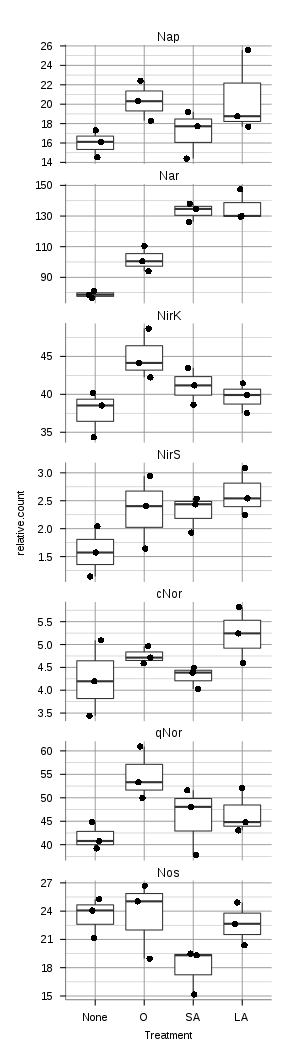

In [36]:
%%R -w 300 -h 1050
p = ggplot(df, aes(x = Treatment, y = relative.count))

p = p + facet_wrap(~Gene.ID, scales = "free_y", ncol = 1)

p = p + geom_boxplot()

p = p + geom_point(size = 3, position = position_jitter(w = 0.15, h = 0))

p = p + theme_agile()

ggsave("/home/armanda/Ox/Ox_DNA.svg", p, h = 5, w = 8)

p

In [37]:
FileLink("/home/armanda/Ox/Ox_DNA.svg")

/home/armanda/Ox/Ox_DNA.svg

In [3]:
%%R
library(dplyr); library(tidyr)
library(phyloseq)
library(ggplot2)
library(vegan)
library(FField)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Use suppressPackageStartupMessages to eliminate package startup messages.

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: permute

In [4]:
!head -n1 /home/armanda/Ox/Ox_DNA.csv

In [5]:
%%R
sd = read.csv("/home/armanda/Ox/Ox_DNA.csv", stringsAsFactors = FALSE) %>%
    select(Sample.Name, Treatment)

rownames(sd) = sd$Sample.Name

sd = sample_data(sd)

In [6]:
%%R
counts = read.csv("/home/armanda/Ox/Ox_DNA.csv", stringsAsFactors = FALSE) %>%
    select(Nap, Nar, NirK, NirS, cNor, qNor, Nos, Sample.Name, Sequence.Read.Depth) %>%
    gather(key, value, -Sample.Name, -Sequence.Read.Depth) %>%
    mutate(count = value / Sequence.Read.Depth * 1000000) %>%
    select(Sample.Name, key, count) %>%
    spread(key, count)

rownames(counts) = counts$Sample.Name

counts$Sample.Name = NULL

counts = otu_table(counts, taxa_are_rows = FALSE)

In [7]:
%%R
ps = phyloseq(sd, counts)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 2 sample variables ]


Square root transformation
Wisconsin double standardization
Run 0 stress 0.0436301 
Run 1 stress 0.0436301 
... procrustes: rmse 1.474348e-05  max resid 2.754275e-05 
*** Solution reached


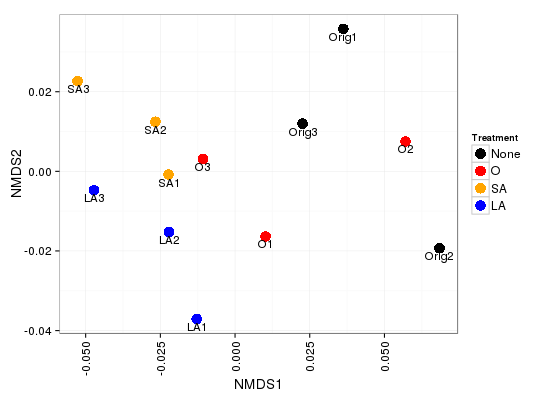

In [15]:
%%R -h 400 -w 550
ord = ordinate(ps, method = "NMDS", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)
ord.plot$Treatment = factor(ord.plot$Treatment, levels = c("None", "O", "SA", "LA"))

ord.plot.nmds = ord.plot

x.fact <- 100 / max(ord.plot.nmds$NMDS1)
y.fact <- 100 / max(ord.plot.nmds$NMDS2)

coords = FFieldPtRep(coords = cbind(ord.plot.nmds$NMDS1 * x.fact,
                                    ord.plot.nmds$NMDS2 * y.fact), 
                     rep.fact = 70)

ord.plot.nmds$text.x = coords$x / x.fact
ord.plot.nmds$text.y = coords$y / y.fact

p = ggplot(ord.plot.nmds, aes(x = NMDS1, y = NMDS2, color = Treatment))

p = p + scale_color_manual(values = c("black", "red", "orange", "blue"))

p = p + geom_point(size = 5)

p = p + scale_size_discrete(range = c(4,8))

p = p + geom_text(color = "black", aes(x = text.x, 
                                       y = text.y,
                                       label = Sample.Name), size = 4, vjust = 1.5, hjust = 0.5)

p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12), 
              axis.text.y = element_text(size = 12), 
              axis.title.x = element_text(size = 14), 
              axis.title.y = element_text(size = 14), 
              strip.text.x = element_text(size = 14), 
              strip.text.y = element_text(size = 14),
              legend.text = element_text(size = 12), 
              strip.background = element_blank())

p = p + guides(color = guide_legend(override.aes = list(size=5)),
               shape = guide_legend(override.aes = list(size = 8)))

ggsave("/home/armanda/Ox/Ox_NMDS.nmds.pdf", h = 5.5, w = 7.75)            

p

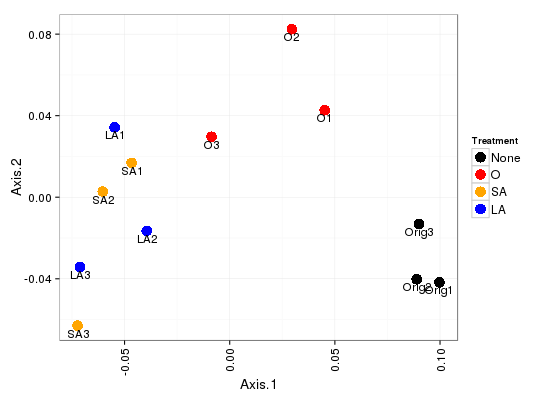

In [13]:
%%R -h 400 -w 550
ord = ordinate(ps, method = "PCoA", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)
ord.plot$Treatment = factor(ord.plot$Treatment, levels = c("None", "O", "SA", "LA"))

ord.plot.mds = ord.plot

p = ggplot(ord.plot, aes(x = Axis.1, y = Axis.2, color = Treatment))

p = p + scale_color_manual(values = c("black", "red", "orange", "blue"))

p = p + geom_point(size = 5)

p = p + scale_size_discrete(range = c(4,8))

p = p + geom_text(color = "black", aes(x = Axis.1, 
                                       y = Axis.2,
                                       label = Sample.Name), size = 4, vjust = 1.5, hjust = 0.5)

p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12), 
              axis.text.y = element_text(size = 12), 
              axis.title.x = element_text(size = 14), 
              axis.title.y = element_text(size = 14), 
              strip.text.x = element_text(size = 14), 
              strip.text.y = element_text(size = 14),
              legend.text = element_text(size = 12), 
              strip.background = element_blank())

p